<a href="https://colab.research.google.com/github/rafaelhora/water-potability/blob/main/EDA_water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Context

According to the NGO Water.org, 785 million people lack access to safe water and 2 billion people lack access to a toilet. Also, Nearly 1 million people die each year from water, sanitation and hygiene-related diseases. It is a health crisis that is not given too much attention in mainstream media. 

![image](https://cloudfront-eu-central-1.images.arcpublishing.com/larazon/Q3KPFJKNJVHN7LR5ECYD5C7J4U.jpg)

Source: La Razón

Improving the access to potable water can reduce child and maternal mortality rates, increase home income and interrupt one aspect of the cicle of poverty. And increasing the capacity of water testing could facilitate this proccess. It is estimated that annually lack of water quality generates 260mi USD in losses (Sadoff et al).
 

## Feature Details


**pH value**: PH is an important parameter in evaluating the acid–base balance of water. **WHO has recommended maximum permissible limit of pH from 6.5 to 8.5.** The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**Hardness**: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. 

**Solids** (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. This is the important parameter for the use of water. **Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.**

**Chloramines**: Chlorine and chloramine are the major disinfectants used in public water systems. **Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.**

**Sulfate**: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**Conductivity**: **Pure water is not a good conductor of electric current rather’s a good insulator.** Increase in ions concentration enhances the electrical conductivity of water. **According to WHO standards, EC value should not exceeded 400 μS/cm.**

**Organic_carbon**: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. **According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.**

**Trihalomethanes**: THMs are chemicals which may be found in water treated with chlorine. **THM levels up to 80 ppm is considered safe in drinking water.**

**Turbidity**: The turbidity of water depends on the quantity of solid matter present in the suspended state. **The WHO recommended value is < 5.00 NTU.**

**Potability**: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# Predicting the Potability of Water using Machine Learning

## Data imports and cleaning

In [1]:
!pip install matplotlib==3.4.3 #google colab version of plt is deprecated and doesn't support some methods used in this notebook

In [2]:
!pip install xgboost==1.4.2 #let's guarantee that the colab version of xgboost is not depracated 

In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import os

In [4]:
#importing dataset 

pwd = os.getcwd()
dataset = pd.read_csv('/content/water_potability.csv')
original_dataset = dataset.copy()
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


We will be dealing with only numerical variables. 

It also can be noted that this dataset has columns with Null values. 

In [6]:
#visualizing with null values
dataset.isnull().sum().reset_index()

,index,0
0,ph,491
1,Hardness,0
2,Solids,0
3,Chloramines,0
4,Sulfate,781
5,Conductivity,0
6,Organic_carbon,0
7,Trihalomethanes,162
8,Turbidity,0
9,Potability,0


We will inpute the median value for each column in the Null cells. 

But please note that it could be possible that the people responsible for the application of this study can request for unreliable measures to be completely dropped, due to the risks contained in the application of this model. 

In [7]:
#imputing missing values
dataset.fillna(value=dataset.median(), inplace=True)
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [8]:
dataset.isnull().sum().reset_index()

,index,0
0,ph,0
1,Hardness,0
2,Solids,0
3,Chloramines,0
4,Sulfate,0
5,Conductivity,0
6,Organic_carbon,0
7,Trihalomethanes,0
8,Turbidity,0
9,Potability,0


No more Null values.

## Exploratory analysis

In [9]:
#defining color palette for this EDA
colors = ['salmon', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:green', 'tab:pink', 'tab:grey', 'tab:olive', 'tab:red', 'tab:cyan']

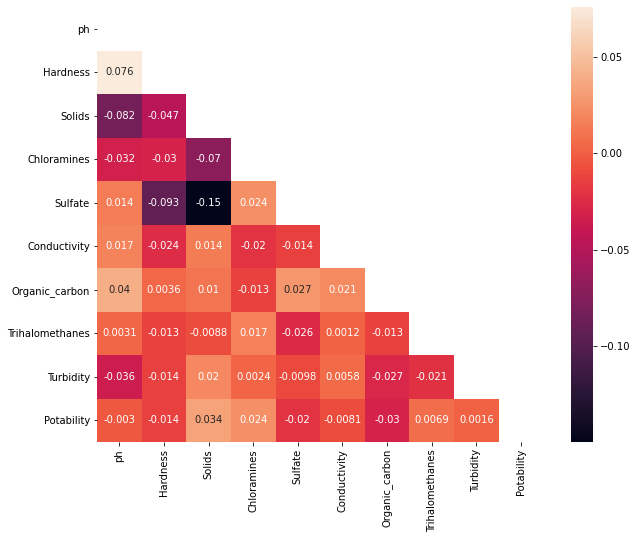

In [10]:
corr = dataset.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr, ax =ax, annot = True, mask = mask)


plt.show()

As we can see in the correlation matrix, no variable represents strong linear co-relation with another. We can assume that linear models will be outperformed by probabilistical models for this study. 

In [11]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


It seems that some samples have Ph o 0, according to my sources this is quite an extreme value of accidity (similar to the accidity of a battery). Also we can see that the maximum value of the samples is 14 which is also an extreme alkaline value (comparable to bleach). 

Source: https://www.healthline.com/health/ph-of-drinking-water

Let's investigate these values  5 < Ph and Ph > 9 for a sanity check.

In [12]:
dataset[dataset.ph < 5].groupby('Potability')['ph'].count()

Potability
0    166
1     80
Name: ph, dtype: int64

In [13]:
dataset[dataset.ph > 9].groupby('Potability')['ph'].count()

Potability
0    203
1    104
Name: ph, dtype: int64

We can see that 184 samples even tho they are in the extremes of the Ph spectrum, are classified as potable. This could be result of input error, measurament error, etc. 

I decided to avoid these instances and will drop them from our dataset.

In [14]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [15]:
dataset = dataset.drop(dataset[dataset.ph > 9].index, axis = 'index')
dataset = dataset.drop(dataset[dataset.ph < 5].index, axis = 'index')

In [16]:
dataset[((dataset.ph < 5) | ((dataset.ph > 9)))].groupby('Potability')['ph'].count()

Series([], Name: ph, dtype: int64)

The query above returns a Null series, this shows that we succesfully deleted the indexes with unreliable Ph values

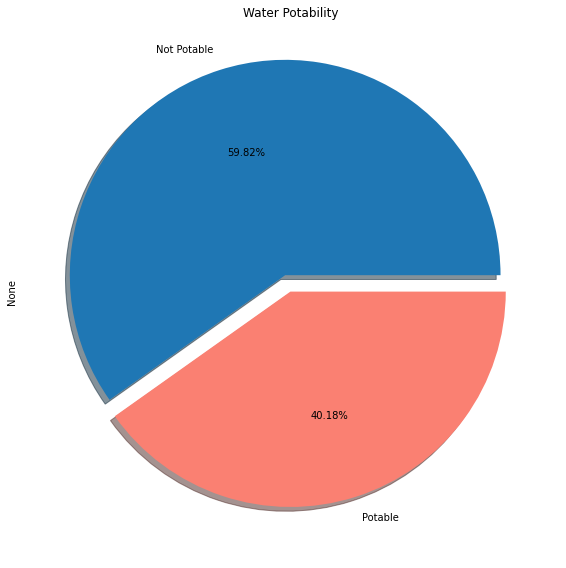

In [17]:
fig, ax = plt.subplots(figsize = (10,8))

dataset.groupby('Potability').size().plot(kind='pie', ax = ax, labels = ['Not Potable', 'Potable'], autopct = '%1.2f%%', colors = {'salmon', 'tab:blue'}, shadow = True, explode = (0.08, 0))

plt.title('Water Potability')
fig.set_facecolor('white')
plt.tight_layout()
plt.show()

This dataset shows a light imbalance towards not potable results, but a 6:4 proportion does not require the use of supersampling techniques. 

In [18]:
print(dataset.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


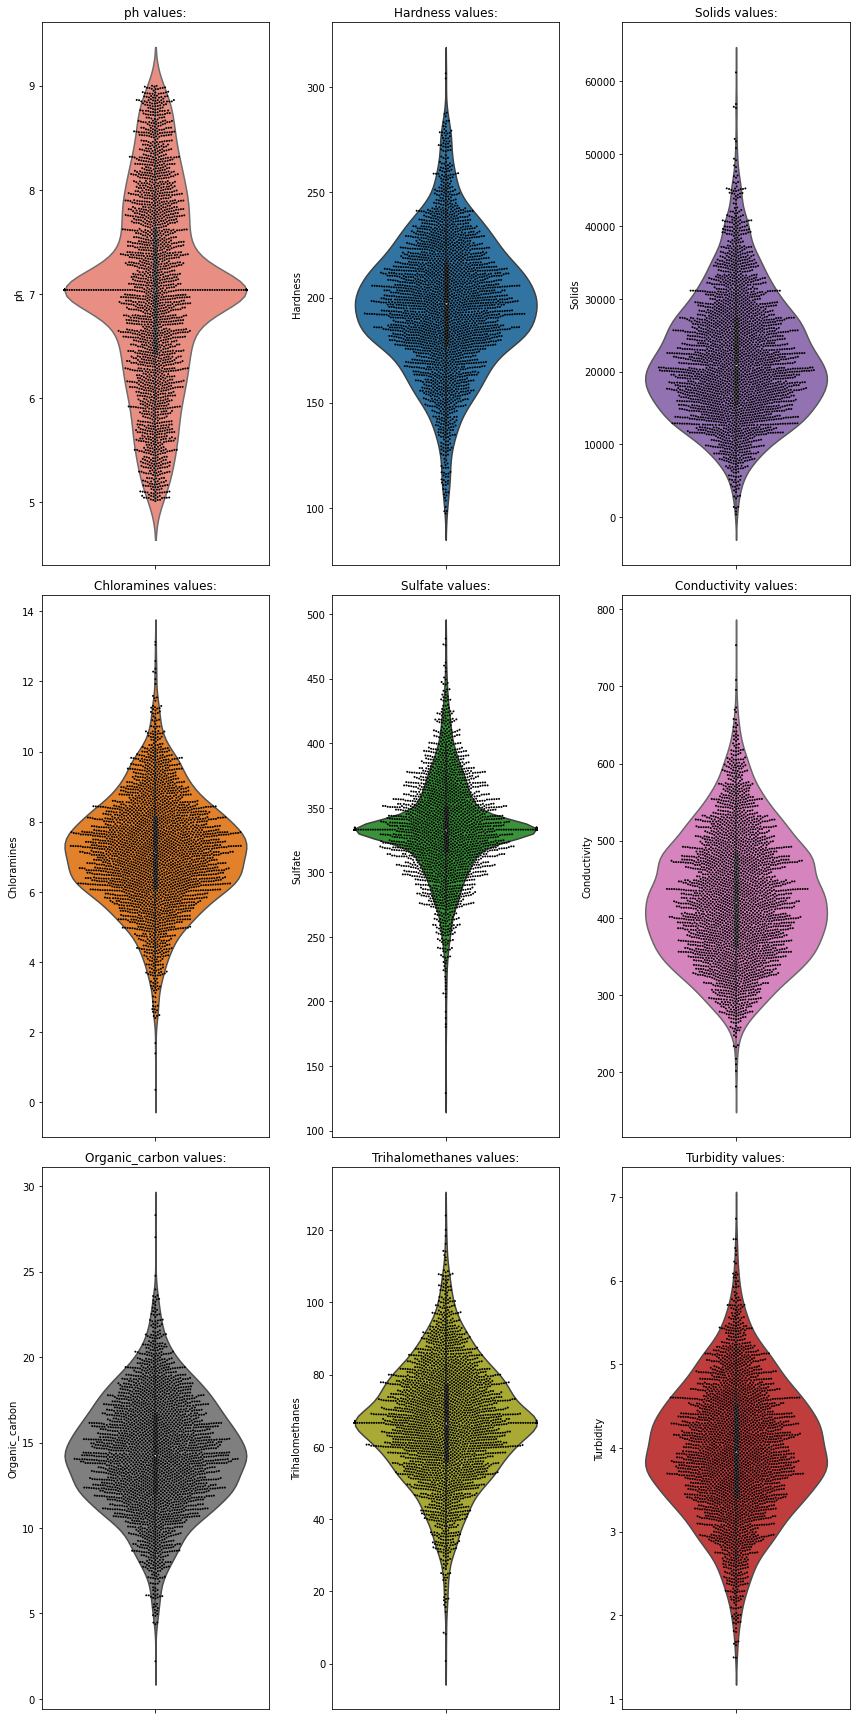

In [19]:
fig, ax = plt.subplots(3,3, figsize = (12,24), squeeze = False)
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

j = 0

for column in columns:
    sns.violinplot(y = dataset[column], ax = ax.flat[j],color = colors[j])
    sns.swarmplot(y = dataset[column], ax = ax.flat[j], size = 2, color = 'black')
    ax.flat[j].set_title(column + ' values:')
    j = j + 1
    

plt.tight_layout()
plt.show()

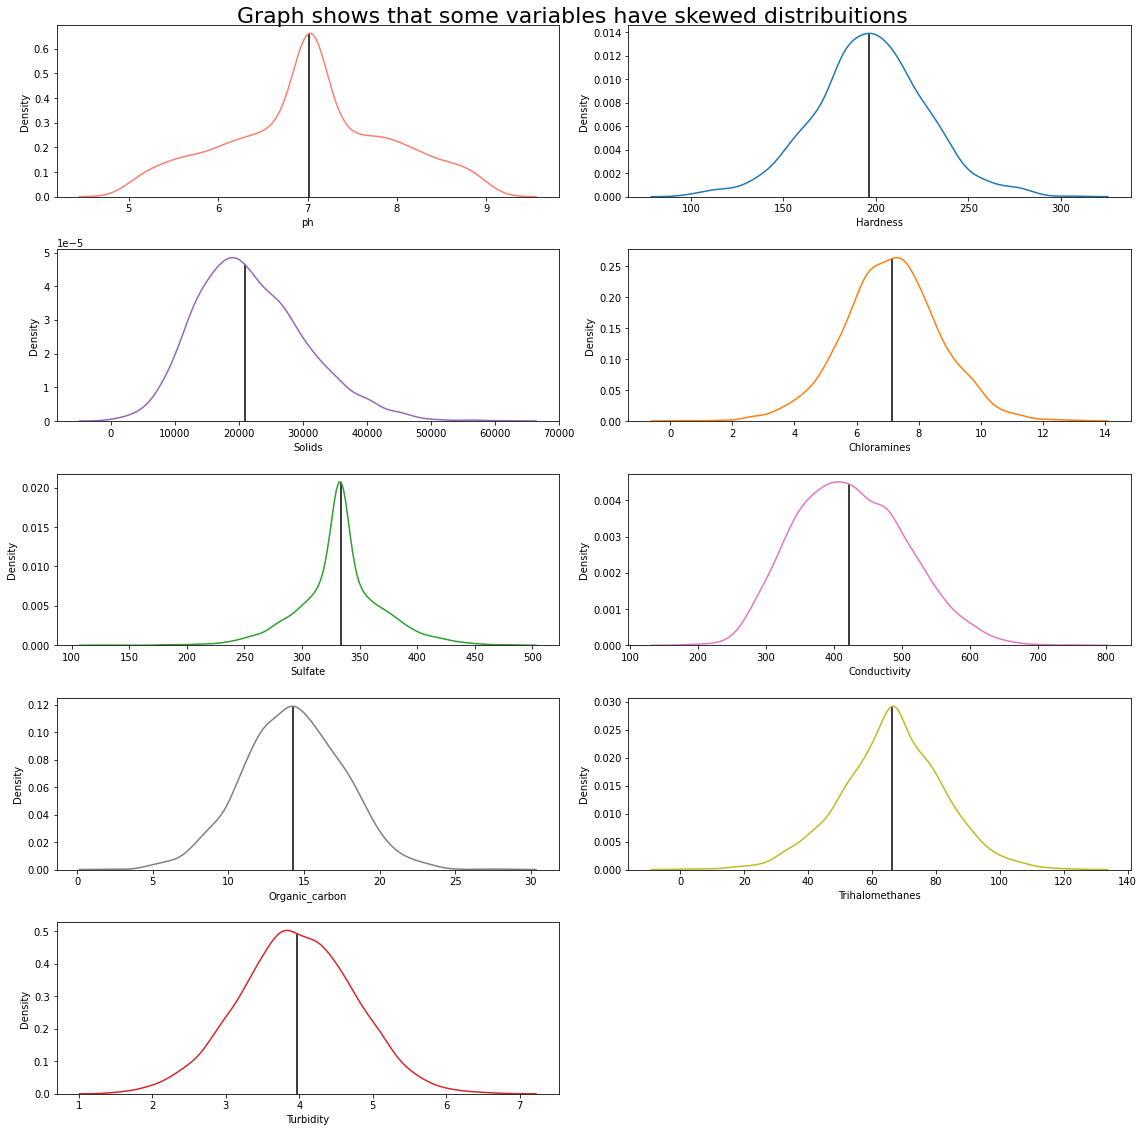

In [20]:
#checking distribuition of data for scaling method selection
fig, axes = plt.subplots(5, 2, squeeze=False, figsize = (16,16))
fig.delaxes(axes.flat[9])
column = 0

for ax in axes.flat:
    p = sns.kdeplot(dataset.iloc[:, column], ax = ax, color = colors[column])
    
    #ploting median line
    x,y = p.get_lines()[0].get_data()
    cdf = scipy.integrate.cumtrapz(y, x, initial = 0)
    nearest_05 = np.abs(cdf - 0.5).argmin()
    x_median = x[nearest_05]
    y_median = y[nearest_05]
    ax.vlines(x_median, 0, y_median, colors = 'black')

    column +=1

plt.suptitle('Graph shows that some variables have skewed distribuitions', size = 22)
plt.tight_layout()
plt.show()

Since our data is skewed, we will use logarithimic scaling. 

## Scaling numeric variables


In [21]:
#scaling variables
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]
#X = np.log(X + 1) #we add 1 becase log of numbers between 0 and 1 are NaN

#separating trainning and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-1.6789717 , -2.0795437 , -0.70293787, ..., -0.43598342,
        -0.53253184,  0.02646247],
       [ 1.1585687 , -2.1419563 , -1.30596296, ...,  0.10192865,
         0.38227635,  0.41583276],
       [ 0.0184817 , -1.13296511, -0.40032512, ...,  0.76801002,
        -0.31278216,  0.21674867],
       ...,
       [-0.23063206, -0.58824833,  1.51873408, ..., -0.21467364,
         0.38717855, -1.00114572],
       [ 0.15418452, -0.47696765, -1.78166471, ..., -1.36789422,
         1.45345615, -0.10418906],
       [ 0.98521587, -0.73296455,  0.88389699, ..., -0.9137862 ,
         0.22701798,  0.86193659]])

## Testing classifiers with standard hyperparameters

The code below is for a function that we will use to visualize each classification model's performance using confusion matrix, and the recall as the main metric. 

We will use recall because the implications of false positives are way worse than false negatives, since recommending the consumption of non-potable water can lead to health problems. 

At the end, the model with the best recall-score will be chosen for hyperparameter tunning. 

In [22]:
#code to visualize model performance

def view_performance (y_test, y_pred, model = ""):

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, xticklabels=['Negative' , 'Positive'], yticklabels=['Negative' , 'Positive'], cmap = 'rocket', fmt = 'g')
    plt.ylabel("Label")
    plt.xlabel("Predicted")
    title = 'Confusion Matrix for classifier'
    plt.title(title)
    plt.show
    model = str(model)
    cls_report = classification_report(y_test, y_pred)
    model_recall = recall_score(y_test, y_pred, average = 'binary')
    print(model, 'classifier results: \n\n\n', cls_report)
    return model_recall

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic classifier results: 


               precision    recall  f1-score   support

           0       0.60      1.00      0.75       410
           1       0.00      0.00      0.00       271

    accuracy                           0.60       681
   macro avg       0.30      0.50      0.38       681
weighted avg       0.36      0.60      0.45       681



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


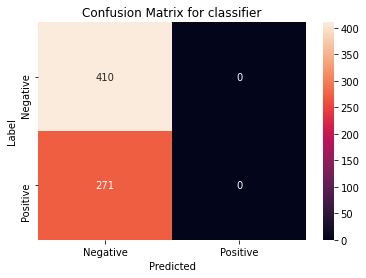

In [24]:
recall_log= view_performance(y_test, y_pred, model = 'Logistic')

### SVC

In [25]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 1, degree=1)
classifier_svm.fit(X_train, y_train)
y_pred = classifier_svm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM classifier results: 


               precision    recall  f1-score   support

           0       0.60      1.00      0.75       410
           1       0.00      0.00      0.00       271

    accuracy                           0.60       681
   macro avg       0.30      0.50      0.38       681
weighted avg       0.36      0.60      0.45       681



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


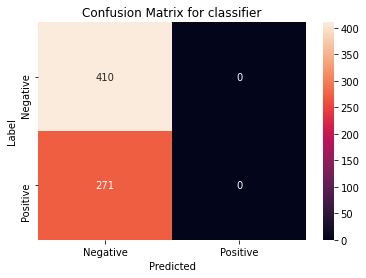

In [26]:
recall_sv = view_performance(y_test, y_pred, model = 'SVM')

### Naïve Bayes

In [27]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Naïve Bayes classifier results: 


               precision    recall  f1-score   support

           0       0.63      0.91      0.74       410
           1       0.58      0.19      0.29       271

    accuracy                           0.62       681
   macro avg       0.61      0.55      0.52       681
weighted avg       0.61      0.62      0.56       681



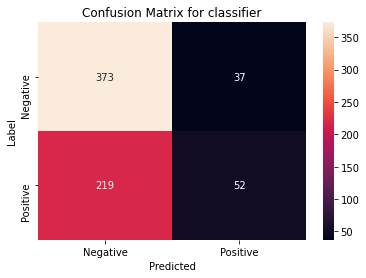

In [28]:
recall_nb = view_performance(y_test, y_pred, model = "Naïve Bayes")

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier_rt = RandomForestClassifier(n_estimators=100, random_state=1)
classifier_rt.fit(X_train, y_train)
y_pred = classifier_rt.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest classifier results: 


               precision    recall  f1-score   support

           0       0.66      0.87      0.75       410
           1       0.63      0.33      0.44       271

    accuracy                           0.66       681
   macro avg       0.65      0.60      0.60       681
weighted avg       0.65      0.66      0.63       681



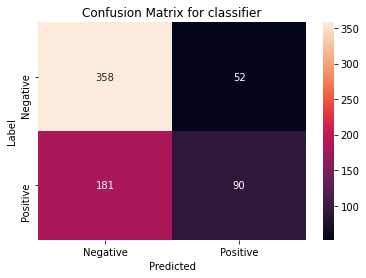

In [30]:
recall_rf = view_performance(y_test, y_pred, model = "Random Forest")

### XGBoost Classifier

In [31]:
import xgboost as xg

classifier_xg = xg.XGBClassifier(use_label_encoder=False)
classifier_xg.fit(X_train, y_train)
y_pred = classifier_xg.predict(X_test)

[21:47:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBoost classifier results: 


               precision    recall  f1-score   support

           0       0.68      0.82      0.74       410
           1       0.61      0.41      0.49       271

    accuracy                           0.66       681
   macro avg       0.64      0.62      0.62       681
weighted avg       0.65      0.66      0.64       681



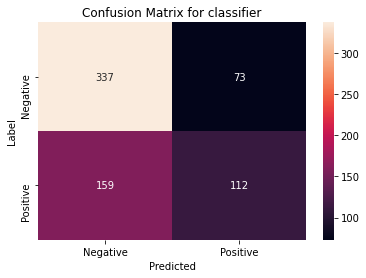

In [32]:
recall_xg = view_performance(y_test, y_pred, model = 'XGBoost')

## Comparing recall scores 

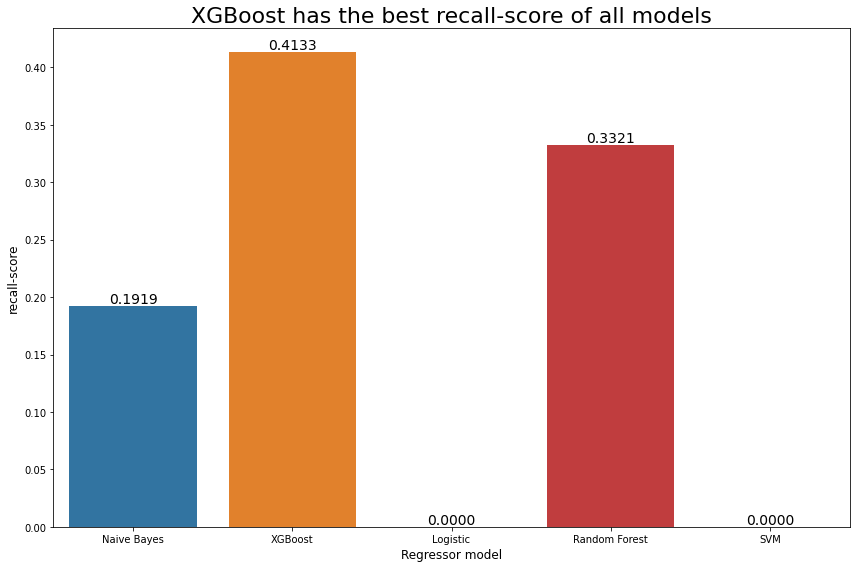

In [33]:
perf = pd.DataFrame.from_dict({'scores':[recall_nb, recall_xg, recall_log, recall_rf, recall_sv], 'models': ['Naive Bayes', 'XGBoost', 'Logistic', 'Random Forest', 'SVM']})

fig, ax = plt.subplots(1,1, figsize= (12,8), squeeze=False)
plot = sns.barplot(data = perf, y = 'scores', x='models')
plt.bar_label(plot.containers[0], fmt ='%.4f', size = 14)

plt.title('XGBoost has the best recall-score of all models', size = 22)
plt.ylabel('recall-score', size = 12)
plt.xlabel('Regressor model', size = 12)
plt.tight_layout()
plt.show()

The logistic and SVM models have been heavily ineffective for this dataset, since in our EDA we observed that the variables have no linear correlation. 
 
**Tree-based models (xbgboost and random forest) gave the best recall-scores.**

Also, analyzing the confusion matrix of all classification models we have a very high rate of false positives, since we are studying of a water potability prediction, this is a importante issue. The implication of a false positive is that people will consume water that may harm their health, so we should keep this in mind when tunning our model.

## Hyperparameter tunning

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

parameters = { 'eta': np.arange(0.01, 0.4, 0.01),
'min_child_weight': np.arange(1, 10, 1),
'max_depth': np.arange(2, 10, 1),
'gamma': np.arange(0.5, 1, 0.05),
'subsample': np.arange(0.5, 1, 0.05),
'colsample_bytree': np.arange(0.5, 1, 0.05),
'lambda': np.arange(1, 2, 0.1),
}

model = XGBClassifier(verbosity =0)
classifier = RandomizedSearchCV(model, parameters, n_iter = 2000, cv = 5, verbose=0, scoring = 'recall')

In [35]:
classifier.fit(X_train, y_train)
print(classifier.best_estimator_)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8500000000000003, eta=0.38,
              gamma=0.8500000000000003, gpu_id=-1, importance_type='gain',
              interaction_constraints='', lambda=1.0, learning_rate=0.379999995,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6500000000000001, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=0)


In [36]:
#saving model with best parameters
import pickle

filename = 'classifier.sav'

pickle.dump(classifier, open(filename, 'wb'))

XGBoost with hyperparameter optimization classifier results: 


               precision    recall  f1-score   support

           0       0.66      0.72      0.69       410
           1       0.51      0.45      0.48       271

    accuracy                           0.61       681
   macro avg       0.59      0.58      0.59       681
weighted avg       0.60      0.61      0.61       681



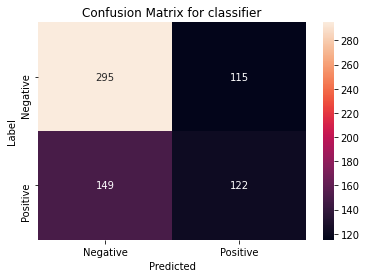

In [37]:
y_pred = classifier.predict(X_test)

recall_xghp = view_performance (y_test, y_pred, model = "XGBoost with hyperparameter optimization")

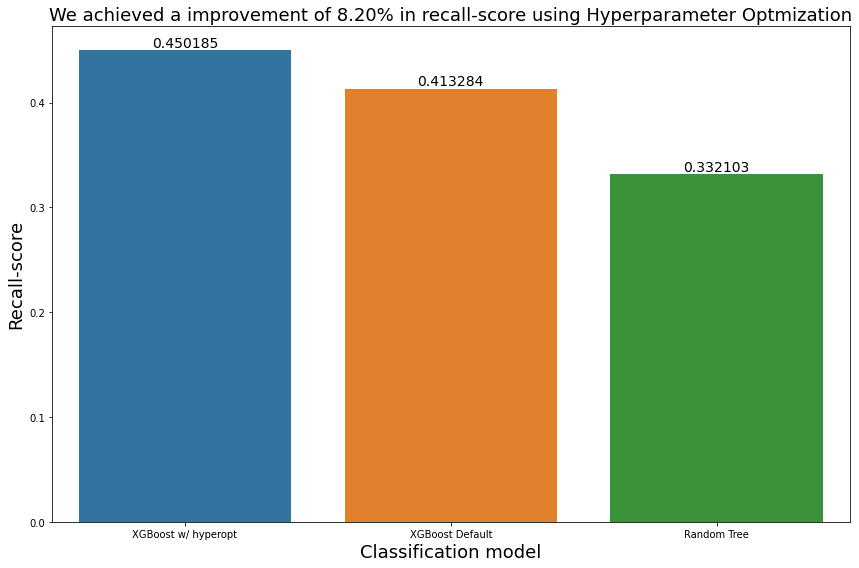

In [38]:
final_perf = pd.DataFrame.from_dict({'score': [recall_xghp, recall_xg, recall_rf], 'model': ['XGBoost w/ hyperopt', 'XGBoost Default', 'Random Tree']})

improvement = 100 - (recall_xg / recall_xghp)*100 

fig, ax = plt.subplots(1,1, figsize = (12,8))

plot = sns.barplot(data = final_perf, x = 'model', y='score', ax = ax)
plt.title(f'We achieved a improvement of {improvement:.2f}% in recall-score using Hyperparameter Optmization', size = 18)
plt.ylabel('Recall-score', size=18)
plt.xlabel('Classification model', size=18)
plt.bar_label(plot.containers[0], fmt ='%.6f', size = 14)

plt.tight_layout()
plt.show()

In [39]:
!pip install shap

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


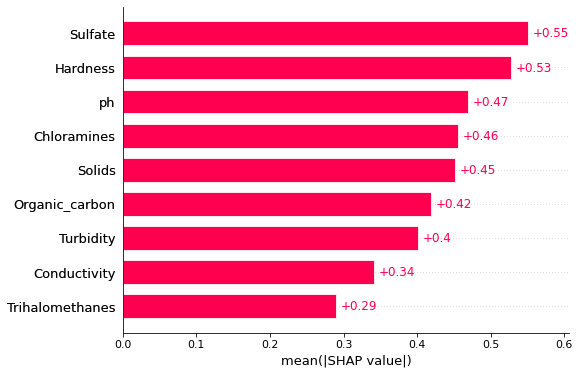

In [40]:
import shap
# explain the model's predictions using SHAP
explainer = shap.Explainer(classifier.best_estimator_)
shap_values = explainer(X)
shap.plots.bar(shap_values)

# Conclusions

From our Exploratory data analysis, and the study of our machine learning model we can take the following conclusions: 

 - As expected the average Ph of the samples is around  7.0 (neutral)
 - The low correlation of variables in this dataset causes linear classifiers to be very ineffective for this case. 
 - The levels of Sulfate, Hardness and Ph of the water are the biggest contributors for the potability of the samples. So the study of the 
 - Even with hyperparameter optmization, I would not recommend the usage of this model in real situations. Our recall-score is less than 50%, and the implications of consumptions of samples that resulted in false-positives outweight any gain from the use of ML. 

 - It is possible that the addition of features that have more correlation in this dataset can improve our accuracy. 